In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(color_codes=True)

In [3]:
data=pd.read_csv("Housing.csv",index_col=0)
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18197,RESIDENTIAL CONDO,"9234 SAWYER BROWN RD, NASHVILLE","July 30, 2014",210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16722,RESIDENTIAL CONDO,"9309 SAWYER BROWN RD, NASHVILLE","June 6, 2014",210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14303,SINGLE FAMILY,"738 HARPETH PKWY W, NASHVILLE","April 16, 2014",195000,0.42,45000.0,99600.0,144600.0,1967.0,3.0,2.0,0.0


In [4]:
data.isnull().sum()

LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
Acre               19897
LandValue          19897
BuildingValue      19897
TotalValue         19897
YearBuilt          21607
Bedrooms           21620
FullBath           21529
HalfBath           21658
dtype: int64

1. Replace the missing values with appropriate approximations

Here we are filling all of the null values, with the mean value of their corresponding columns.

In [5]:
data['Acre']=data["Acre"].fillna(np.mean(data["Acre"]))
data['LandValue']=data["LandValue"].fillna(np.mean(data["LandValue"]))
data['BuildingValue']=data["BuildingValue"].fillna(np.mean(data["BuildingValue"]))
data['TotalValue']=data["TotalValue"].fillna(np.mean(data["TotalValue"]))
data['YearBuilt']=data["YearBuilt"].fillna(np.mean(data["YearBuilt"]))
data['Bedrooms']=data["Bedrooms"].fillna(np.mean(data["Bedrooms"]))
data['FullBath']=data["FullBath"].fillna(np.mean(data["FullBath"]))
data['HalfBath']=data["HalfBath"].fillna(np.mean(data["HalfBath"]))
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18197,RESIDENTIAL CONDO,"9234 SAWYER BROWN RD, NASHVILLE","July 30, 2014",210000,0.449233,67566.948358,159112.830994,229310.964346,1961.806766,3.076771,1.865587,0.273795
16722,RESIDENTIAL CONDO,"9309 SAWYER BROWN RD, NASHVILLE","June 6, 2014",210000,0.449233,67566.948358,159112.830994,229310.964346,1961.806766,3.076771,1.865587,0.273795
14303,SINGLE FAMILY,"738 HARPETH PKWY W, NASHVILLE","April 16, 2014",195000,0.420000,45000.000000,99600.000000,144600.000000,1967.000000,3.000000,2.000000,0.000000


2. Rename the columns to better suited names

In [13]:
data.columns

Index(['LandUse', 'PropertyAddress', 'SaleDate', 'SalePrice', 'Acre',
       'LandValue', 'BuildingValue', 'TotalValue', 'YearBuilt', 'Bedrooms',
       'FullBathroom', 'HalfBathroom', 'Year', 'Month', 'Day'],
      dtype='object')

In [14]:
data.rename(columns={"FullBath":"FullBathroom"},inplace=True)
data.rename(columns={"HalfBath":"HalfBathroom"},inplace=True)

3. Extract the month and year from the sale date.



In [12]:
data['Year']=pd.DatetimeIndex(data['SaleDate']).year
data['Month']=pd.DatetimeIndex(data['SaleDate']).month
data['Day']=pd.DatetimeIndex(data['SaleDate']).day
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day
UniqueID,,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18197,RESIDENTIAL CONDO,"9234 SAWYER BROWN RD, NASHVILLE","July 30, 2014",210000,0.449233,67566.948358,159112.830994,229310.964346,1961.806766,3.076771,1.865587,0.273795,2014,7,30
16722,RESIDENTIAL CONDO,"9309 SAWYER BROWN RD, NASHVILLE","June 6, 2014",210000,0.449233,67566.948358,159112.830994,229310.964346,1961.806766,3.076771,1.865587,0.273795,2014,6,6
14303,SINGLE FAMILY,"738 HARPETH PKWY W, NASHVILLE","April 16, 2014",195000,0.420000,45000.000000,99600.000000,144600.000000,1967.000000,3.000000,2.000000,0.000000,2014,4,16


4. Extract the pin number from the property address

In [15]:
data['Pin'] = data['PropertyAddress'].str[:4]
data['Pin']

UniqueID 
2045     1808
16918    1832
54582    1864
43070    1853
22714    1829
         ... 
18197    9234
16722    9309
14303    738 
40443    730 
52966    722 
Name: Pin, Length: 41914, dtype: object

1. How has the price of properties changed over the years

In [16]:
sales_grouped_data = data.groupby('Year')['SalePrice'].count()
sales_grouped_data

Year
2013     8393
2014    10713
2015    12345
2016    10463
Name: SalePrice, dtype: int64

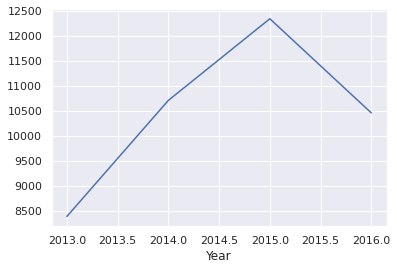

In [17]:
sns.lineplot(x=sales_grouped_data.index, y =sales_grouped_data.values)

2. Does a specific month or span of months have the highest property prices?

In [18]:
month_grouped_data = data.groupby('Month')['SalePrice'].count()
month_grouped_data

Month
1     2452
2     2098
3     3310
4     3928
5     4428
6     4876
7     4065
8     4109
9     3986
10    3580
11    2373
12    2709
Name: SalePrice, dtype: int64

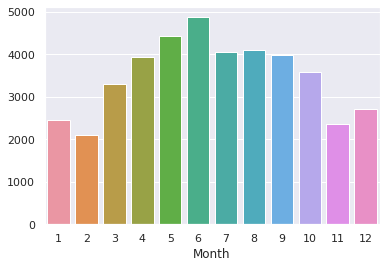

In [19]:
sns.barplot(x=month_grouped_data.index,y=month_grouped_data.values)

From the above barplot, we can make out that the sales are at their peak during the middle of the year, especially around June.

3. For what purpose were the properties generally purchased?

In [20]:
data['LandUse'].unique()

array(['SINGLE FAMILY', 'RESIDENTIAL CONDO', 'VACANT RURAL LAND',
       'VACANT RES LAND', 'DUPLEX', 'VACANT RESIDENTIAL LAND', 'CHURCH',
       'ZERO LOT LINE', 'RESIDENTIAL COMBO/MISC', 'PARSONAGE',
       'OFFICE BLDG (ONE OR TWO STORIES)',
       'GREENBELT/RES\r\nGRRENBELT/RES', 'MOBILE HOME', 'PARKING LOT',
       'CLUB/UNION HALL/LODGE', 'TRIPLEX', 'VACANT ZONED MULTI FAMILY',
       'SPLIT CLASS', 'CONDO', 'QUADPLEX', 'LIGHT MANUFACTURING',
       'FOREST', 'CONVENIENCE MARKET WITHOUT GAS',
       'DORMITORY/BOARDING HOUSE', 'GREENBELT', 'DAY CARE CENTER',
       'METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK',
       'TERMINAL/DISTRIBUTION WAREHOUSE', 'NIGHTCLUB/LOUNGE',
       'RESTURANT/CAFETERIA', 'VACANT COMMERCIAL LAND',
       'CONDOMINIUM OFC  OR OTHER COM CONDO', 'STRIP SHOPPING CENTER',
       'VACANT RESIENTIAL LAND', 'APARTMENT: LOW RISE (BUILT SINCE 1960)',
       'ONE STORY GENERAL RETAIL STORE', 'NON-PROFIT CHARITABLE SERVICE',
       'SMALL SERVICE SHOP', 'MORTUAR

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


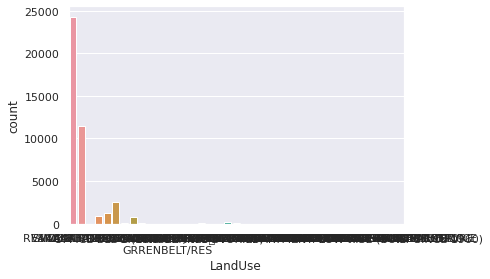

In [21]:
sns.countplot(x='LandUse', data = data)

In [22]:
purpose_grouped_data = data.groupby('LandUse')['LandUse'].count()
purpose_grouped_data.sort_values(ascending = False)

LandUse
SINGLE FAMILY                                 24298
RESIDENTIAL CONDO                             11508
VACANT RESIDENTIAL LAND                        2537
DUPLEX                                         1267
VACANT RES LAND                                 921
ZERO LOT LINE                                   798
CONDO                                           183
RESIDENTIAL COMBO/MISC                           93
TRIPLEX                                          91
QUADPLEX                                         37
CHURCH                                           30
CONDOMINIUM OFC  OR OTHER COM CONDO              22
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         18
VACANT COMMERCIAL LAND                           17
SPLIT CLASS                                      15
PARKING LOT                                      11
FOREST                                            8
GREENBELT                                         8
PARS

Clearly, from the above arrangement 'SINGLE FAMILY' and 'RESIDENTIAL CONDO' were the major reasons for the purchase of houses

4. What is the average age of the properties?

In [23]:
math.trunc(data['YearBuilt'].mean())

1961

In [24]:
data['YearBuilt'].max()

2017.0

5. Have the age of houses affected the price?

In [25]:
data.head()

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin
UniqueID,,,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,2013,4,9,1808
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,2014,6,10,1832
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,2016,9,26,1864
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,2016,1,29,1853
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,2014,10,10,1829


In [26]:
age_grouped_data = data.groupby('YearBuilt')['SalePrice'].count()
age_grouped_data

YearBuilt
1799.0      1
1832.0      1
1870.0      2
1880.0      1
1890.0      1
         ... 
2013.0    293
2014.0    505
2015.0    678
2016.0    577
2017.0     13
Name: SalePrice, Length: 127, dtype: int64

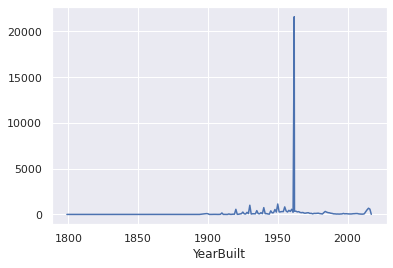

In [27]:
sns.lineplot(x=age_grouped_data.index, y=age_grouped_data.values)

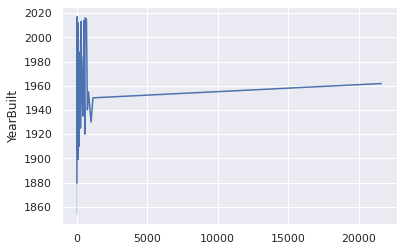

In [28]:
sns.lineplot(y=age_grouped_data.index, x=age_grouped_data.values)

From the above charts it definitely seems that the houses built during between 1940 and 1960 have peaked a lot. The peak is very high compared to other years, but there isn't any continuing trend to showcase that age has always affected the strength.

6. Have the number of rooms in the house affected the price?

In [29]:
data['TotalRooms'] = data['Bedrooms'] + data['FullBathroom'] + data['HalfBathroom']
data['TotalRooms']

UniqueID 
2045     6.000000
16918    8.000000
54582    7.000000
43070    6.000000
22714    7.000000
           ...   
18197    5.216154
16722    5.216154
14303    5.000000
40443    6.000000
52966    5.216154
Name: TotalRooms, Length: 41914, dtype: float64

In [30]:
rooms_grouped_data = data.groupby('TotalRooms')['SalePrice'].count()
rooms_grouped_data

TotalRooms
0.000000        30
1.000000         2
2.000000        95
3.000000      3230
3.076771        91
3.273795         1
4.000000      3701
4.273795         7
5.000000      5678
5.139383         1
5.216154     21528
5.273795        46
6.000000      3841
6.273795        54
7.000000      1645
7.273795        17
8.000000       945
8.076771         1
8.273795         4
9.000000       448
10.000000      246
11.000000      168
12.000000       73
13.000000       39
14.000000       14
15.000000        3
16.000000        2
17.000000        1
20.000000        2
22.000000        1
Name: SalePrice, dtype: int64

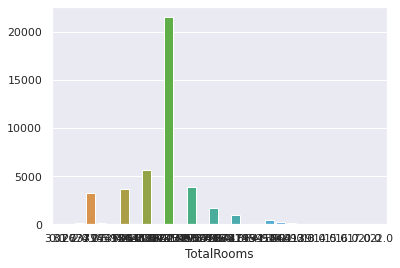

In [31]:
sns.barplot(x = rooms_grouped_data.index, y = rooms_grouped_data.values)

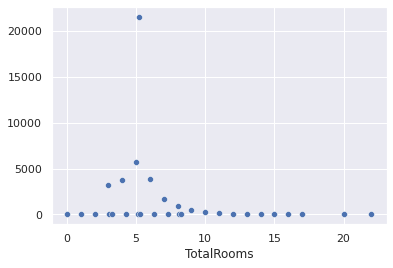

In [32]:
sns.scatterplot(x=rooms_grouped_data.index, y=rooms_grouped_data.values)

In [33]:
math.trunc(data['TotalRooms'].mean())

5

Here, we make an interesting obervation that the sale prices of houses with 5 rooms is the maximum by a large extent. And, in fact, the the number of houses around 5 also show a considerably high sales price. Since, the mean of all of the number of houses is also 5, it's interesting to note that sales prices tend to be high with an average number of rooms in a house.

7. Does the size of the property (no. of acres) have any influence in its price?

In [34]:
property_grouped_data=data.groupby('Acre')['SalePrice'].count()
property_grouped_data

Acre
0.01      3
0.02      6
0.03      5
0.04     12
0.05     19
         ..
35.97     1
41.24     1
47.50     1
51.34     1
68.79     1
Name: SalePrice, Length: 441, dtype: int64

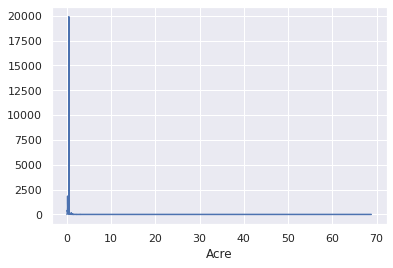

In [35]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)

[(0.0, 12.0)]

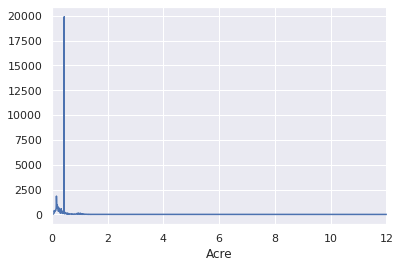

In [36]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)
plot.set(xlim=(0,12))

[(0.0, 1.0)]

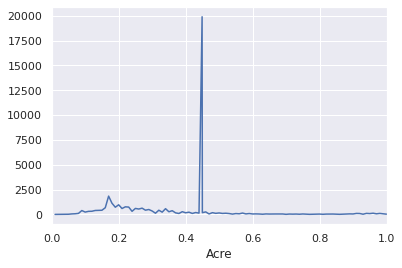

In [37]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)
plot.set(xlim=(0,1))

In [38]:
round(data['Acre'].mean(), 2)

0.45

Though there isn't any repeating trend, it is evident from the above line chart that the sale price is at its highest when the size of the property is near or equal to the mean size, that is 0.5

8. Are houses located in specific pin numbers expensive over the others?

In [39]:
pin_grouped_data = data.groupby('Pin')['SalePrice'].count()
pin_grouped_data

Pin
  12    1
  AC    1
  HA    1
  LO    2
  MA    1
       ..
STOK    1
STRA    1
SUNN    1
WASH    2
WEST    1
Name: SalePrice, Length: 5145, dtype: int64

9. How have house prices changed in the 21st century as supposed to 20th century.

In [45]:
for i in range(0,len(data)):
  if data['YearBuilt'][i]>=2000:
    data['20th_Century'][i] = data['YearBuilt'][i]
data['20th_Century']

KeyError: ignored